In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

### Data Preprocessing

In [3]:
data = pd.read_csv('data.csv')


In [4]:
data


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [15]:
x_data = data['sqft_living']
y_data = data['price']

In [13]:
x_data
y_data
len(x_data), len(y_data)

(4600, 4600)

In [ ]:
# 80% train, 20% validation : random selection

In [17]:
def train_validation_split(x, y, validation_size=0.2, random_state=None):
    x_validation = x.sample()

SyntaxError: incomplete input (4243159900.py, line 1)

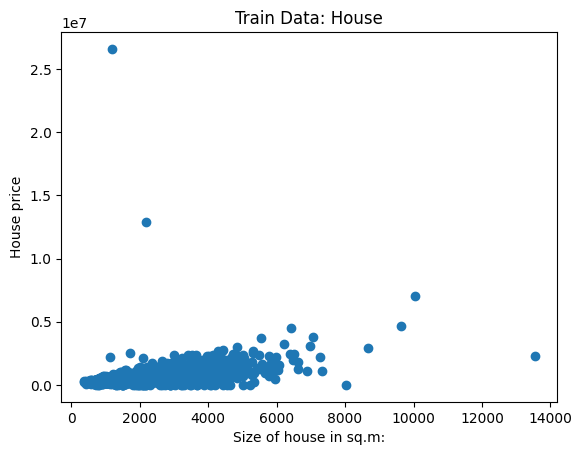

In [16]:
plt.scatter(x_data, y_data)
plt.title("Train Data: House")
plt.xlabel("Size of house in sq.m:")
plt.ylabel("House price")
plt.show()

In [23]:
x_train.shape

(5,)

### Training

In [8]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0

    for i in range(0, m):
        f_wb = w * x[i] + b
        cost += (f_wb - y[i])**2

    total_cost = cost / (2 * m)
    return total_cost

In [27]:
compute_cost(x_train, y_train, w=1.5, b=0)

9166115265.0

In [9]:
def compute_gradients(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(0, m):
        f_wb = w * x[i] + b
        dj_dw += (f_wb - y[i]) * x[i]
        dj_db += (f_wb - y[i])

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

In [30]:
compute_gradients(x_train, y_train, w=10, b=10)

(-9212560.0, -127350.0)

In [10]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iterations, cost_function, gradient_function):

    w = copy.deepcopy(w_in)
    b = copy.deepcopy(b_in)

    # cost function evolution - loss
    j_history = []

    for i in range(0, num_iterations):
        dj_dw, dj_db = gradient_function(x, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        j_history.append(cost_function(x, y, w, b))

        print(f"Iteraton: {i} | Cost: {j_history[i]:.4} | dj_dw: {dj_dw:.4}, | dj_db: {dj_db:.4} | w: {w:.4} | b: {b:.4}")

    return w, b, j_history

    
    
    

In [24]:
w_init = 0
b_init = 0

iterations = 10
alpha = 1.0e-5

w_final, b_final, j_history = gradient_descent(x=x_train, y=y_train, w_in=w_init, b_in=b_init, alpha=alpha, num_iterations=iterations, cost_function=compute_cost, gradient_function=compute_gradients)
print(f"(w, b) found by gradient descent {w_final:.4} {b_final:.4}")

Iteraton: 0 | Cost: 1.516e+09 | dj_dw: -9.26e+06, | dj_db: -1.28e+05 | w: 2.778e+03 | b: 38.4
Iteraton: 1 | Cost: 2.636e+08 | dj_dw: 3.743e+06, | dj_db: 4.983e+04 | w: 1.655e+03 | b: 23.45
Iteraton: 2 | Cost: 5.888e+07 | dj_dw: -1.513e+06, | dj_db: -2.206e+04 | w: 2.109e+03 | b: 30.07
Iteraton: 3 | Cost: 2.543e+07 | dj_dw: 6.118e+05, | dj_db: 7.003e+03 | w: 1.925e+03 | b: 27.97
Iteraton: 4 | Cost: 1.996e+07 | dj_dw: -2.473e+05, | dj_db: -4.746e+03 | w: 2e+03 | b: 29.39
Iteraton: 5 | Cost: 1.907e+07 | dj_dw: 1e+05, | dj_db: 3.701 | w: 1.97e+03 | b: 29.39
Iteraton: 6 | Cost: 1.892e+07 | dj_dw: -4.04e+04, | dj_db: -1.916e+03 | w: 1.982e+03 | b: 29.97
Iteraton: 7 | Cost: 1.889e+07 | dj_dw: 1.636e+04, | dj_db: -1.14e+03 | w: 1.977e+03 | b: 30.31
Iteraton: 8 | Cost: 1.889e+07 | dj_dw: -6.587e+03, | dj_db: -1.454e+03 | w: 1.979e+03 | b: 30.74
Iteraton: 9 | Cost: 1.889e+07 | dj_dw: 2.689e+03, | dj_db: -1.327e+03 | w: 1.978e+03 | b: 31.14
Iteraton: 10 | Cost: 1.889e+07 | dj_dw: -1.061e+03, | dj

In [25]:
j_history

[1516077310.0799985,
 263575550.75001973,
 58880942.8086731,
 25427599.256992,
 19959911.864977896,
 19065870.658561178,
 18919292.371351305,
 18894870.658259764,
 18890412.812352978,
 18889217.66078383,
 18888555.760492597,
 18887981.043438334,
 18887420.609509654,
 18886862.544767972,
 18886304.90213696,
 18885747.36340665,
 18885189.876569975,
 18884632.433124974,
 18884075.031679444,
 18883517.672003355]

### Metrics

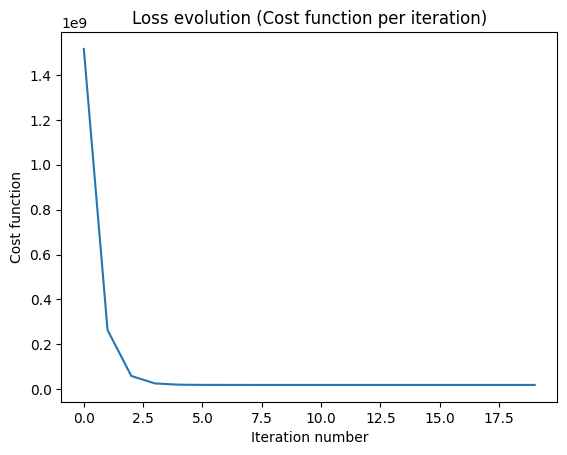

In [26]:
plt.plot(j_history)
plt.title("Loss evolution (Cost function per iteration)")
plt.xlabel("Iteration number")
plt.ylabel("Cost function")
plt.show()

In [44]:
def r2_score(y, y_):
    num = np.sum((y - y_)**2)
    denum = np.sum((y - y.mean())**2)

    score = 1 - num / denum
    return score

In [45]:
y_ = [w_final * i + b_final for i in x_train]
y_

[59379.87227105263,
 98942.9642045718,
 118724.51017133139,
 158287.60210485058,
 197850.69403836975]

In [46]:
# the greater the r2 score the more correct our prediction is
r2_score(y_train, y_) # between 0 and 1.

0.9808871278623448

### Prediction

In [ ]:
x_train = np.array([30, 50, 60, 80, 100])
y_train = np.array([70000, 100000, 120000, 150000, 200000])

In [35]:
size_of_house = 20
print(f"A house with size(m^2) {size_of_house} has a price of: {w_final * size_of_house + b_final}")

size_of_house = 30
print(f"A house with size(m^2) {size_of_house} has a price of: {w_final * size_of_house + b_final}")


size_of_house = 50
print(f"A house with size(m^2) {size_of_house} has a price of: {w_final * size_of_house + b_final}")

size_of_house = 60
print(f"A house with size(m^2) {size_of_house} has a price of: {w_final * size_of_house + b_final}")


size_of_house = 80
print(f"A house with size(m^2) {size_of_house} has a price of: {w_final * size_of_house + b_final}")


size_of_house = 100
print(f"A house with size(m^2) {size_of_house} has a price of: {w_final * size_of_house + b_final}")



A house with size(m^2) 20 has a price of: 39598.32630429304
A house with size(m^2) 30 has a price of: 59379.87227105263
A house with size(m^2) 50 has a price of: 98942.9642045718
A house with size(m^2) 60 has a price of: 118724.51017133139
A house with size(m^2) 80 has a price of: 158287.60210485058
A house with size(m^2) 100 has a price of: 197850.69403836975


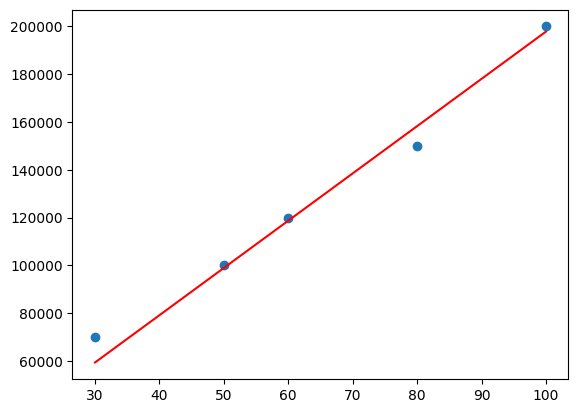

In [37]:
plt.scatter(x_train, y_train)
plt.plot(x_train, w_final * x_train + b_final, c='r')